http://ww2.amstat.org/publications/jse/v21n1/witt.pdf

http://nsidc.org/research/bios/fetterer.html

ftp://sidads.colorado.edu/DATASETS/NOAA/G02135/north/monthly/data/N_08_extent_v3.0.csv

In [6]:
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt

import seaborn as sns
sns.set(font_scale=2)
plt.style.use('seaborn-whitegrid')
%matplotlib inline

import pandas as pd

from scipy import stats

## Read Data

In [7]:
data = pd.read_csv('N_09_extent_v3.0.csv', dtype={'year': np.int32, 'extent': np.double})

In [8]:
data.head()

,year,mo,data-type,region,extent,area
0,1979,9,Goddard,N,7.05,4.58
1,1980,9,Goddard,N,7.67,4.87
2,1981,9,Goddard,N,7.14,4.44
3,1982,9,Goddard,N,7.30,4.43
4,1983,9,Goddard,N,7.39,4.70


In [9]:
data.dtypes

year               int32
 mo                int64
    data-type     object
 region           object
 extent          float64
   area          float64
dtype: object

In [10]:
year = data['year']
extent = data[' extent']

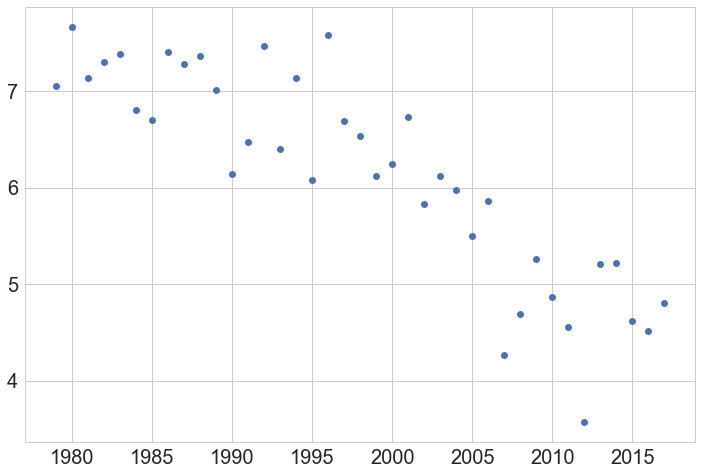

In [11]:
plt.figure(figsize=(12,8))
plt.plot(year, extent, 'o')

## Try a linear fit

In [ ]:
ndata = 20 #use the first ndata points for the fit

a, b, rvalue, pvalue, stderr = stats.linregress(year[:ndata], extent[:ndata])
yfit = a*year + b # linear function

plt.figure(figsize=(12,8))
plt.plot(year, yfit, 'r-')
plt.plot(year, extent, 'o')
print(rvalue)

### How far off is this fit?

In [ ]:
residual = la.norm(extent - yfit,2)
print(residual)
plt.plot(year, extent - yfit, 'o')

### How did the linear fit "fit" as time time progresses?

In [ ]:
plt.figure(figsize=(20,8))
res = []
for y in range(22, len(extent)+1):
    a, b, rvalue, pvalue, stderr = stats.linregress(year[:y], extent[:y])
    yfit = a*year[:y] + b

    plt.plot(year[:y], yfit, '-', label='%d' % (1979+y))

plt.plot(year[:y], extent[:y], 'o')
plt.legend()

### Let's try a quadratic fit

In [ ]:
year = data['year']
extent = data[' extent']

plt.figure(figsize=(12,8))
plt.plot(year, extent, 'o')

#extent = extent[:30]
#year = year[:30]



quadratic, linear, intercept = np.polyfit(year, extent, 2)
yfit = quadratic*year**2 + linear*year + intercept


plt.plot(year, yfit, 'r-')


rvalue = np.sqrt(1 - ((yfit - extent)**2).sum() / ((extent - np.mean(extent))**2).sum())

print(rvalue)

In [ ]:
plt.plot(year, extent - yfit, 'o')
residual = la.norm(extent - yfit,2)
print(residual)

## What about a cubic?

What goes wrong here?

In [ ]:
year = data['year']
extent = data[' extent']
 
x3, x2, x1, x0 = np.polyfit(year, extent, 3)
yfit = x3*year**3 + x2*year**2 + x1*year + x0

plt.figure(figsize=(12,8))
plt.plot(year, yfit, 'r-')
plt.plot(year, extent, 'o')

rvalue = np.sqrt(1 - ((yfit - extent)**2).sum() / ((extent - np.mean(extent))**2).sum())

print(rvalue)

## Comparing Least Squares function and Normal Equations solution

In [13]:
def fitfunction(t,coeffs):
    return  coeffs[0]+ coeffs[1]*t + coeffs[2]*t**2

1593.27741579
[  7.32702301e+00  -2.55283521e-02  -1.60576890e-03]
3.07300068713


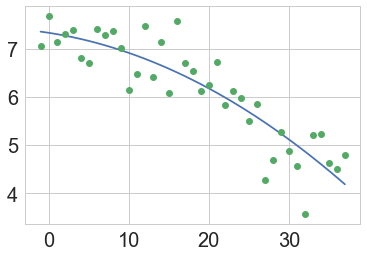

In [18]:
year = data['year']

year = year - 1980

A = np.array([
    1+0*year,
    year,year**2
    ]).T

b = np.array(extent)

x = la.solve(A.T@A,A.T@b)

print(la.cond(A))

print(x)

print(la.norm(A@x-b))

plt.plot(year, fitfunction(year,x))
plt.plot(year, b, 'o')


[  7.32702301e+00  -2.55283521e-02  -1.60576890e-03]
[ 9.44333322]
3
[  3.85217543e+03   3.33108488e+01   2.41776817e+00]
3.07300068713


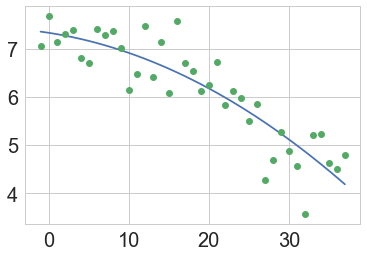

In [19]:
coeffs,residual,rank,sval=np.linalg.lstsq(A,b)

plt.plot(year, fitfunction(year,coeffs))
plt.plot(year, b, 'o')

print(coeffs)
print(residual)
print(rank)
print(sval)

print(la.norm(A@x-b))